## IMPORT LIBRARY & LOAD DATASET


In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")


# Load Data
df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## CEK KUALITAS DATA

In [3]:
# Struktur Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
# Statistik Deskriptif
df.describe(include='all')


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [5]:
# Cek missing value
df.isnull().sum()


,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [6]:
# Cek duplikasi data
df.duplicated().sum()


np.int64(0)

## EXPLORATORY DATA ANALYSIS

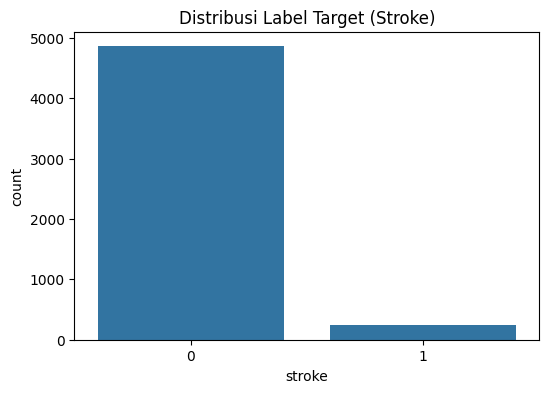

,proportion
stroke,
0,95.127202
1,4.872798


In [7]:
# Distribusi Target (Stroke)

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='stroke')
plt.title("Distribusi Label Target (Stroke)")
plt.show()

df['stroke'].value_counts(normalize=True) * 100


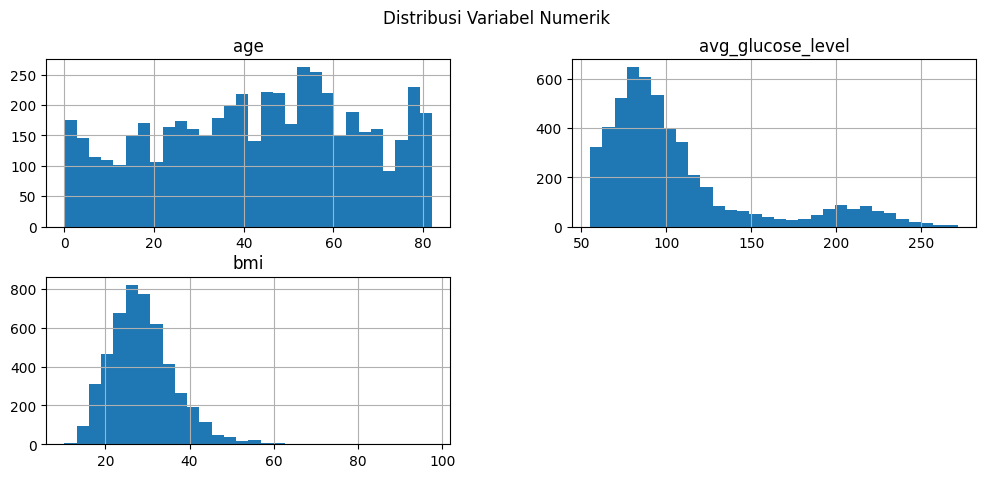

In [8]:
# Distribusi Variabel Numerik
num_cols = ['age', 'avg_glucose_level', 'bmi']

df[num_cols].hist(bins=30, figsize=(12,5))
plt.suptitle("Distribusi Variabel Numerik")
plt.show()


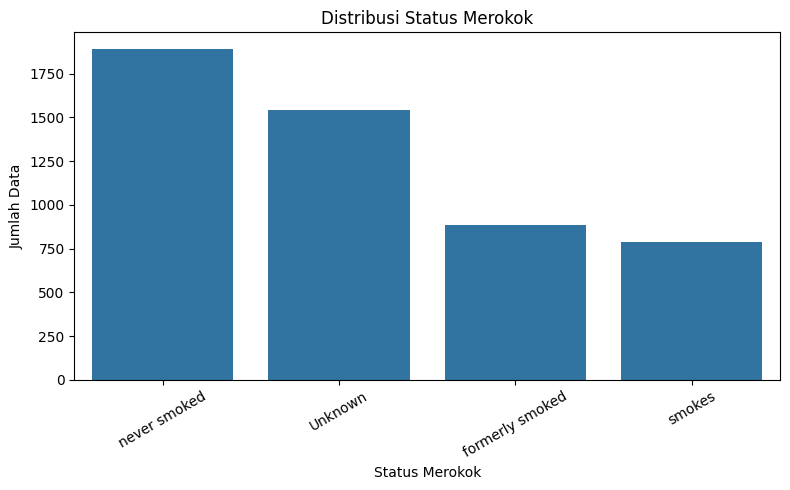

In [9]:
# Distribusi Status Merokok

plt.figure(figsize=(8,5))
sns.countplot(data=df, x="smoking_status", order=df["smoking_status"].value_counts().index)
plt.title("Distribusi Status Merokok")
plt.xlabel("Status Merokok")
plt.ylabel("Jumlah Data")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


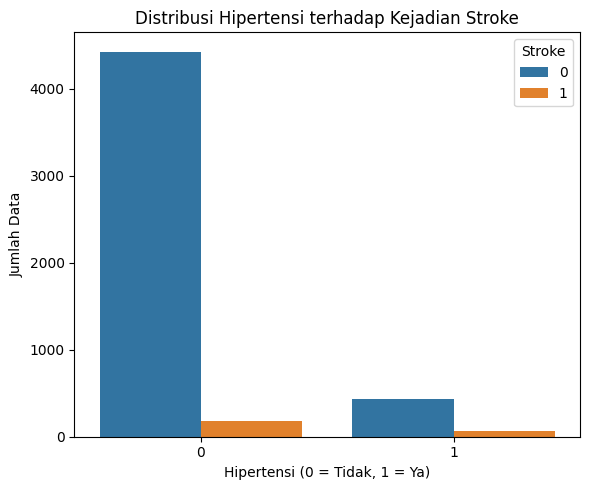

In [10]:
# Distribusi Hipertensi terhadap Stroke
plt.figure(figsize=(6,5))
sns.countplot(data=df, x="hypertension", hue="stroke")
plt.title("Distribusi Hipertensi terhadap Kejadian Stroke")
plt.xlabel("Hipertensi (0 = Tidak, 1 = Ya)")
plt.ylabel("Jumlah Data")
plt.legend(title="Stroke")
plt.tight_layout()
plt.show()


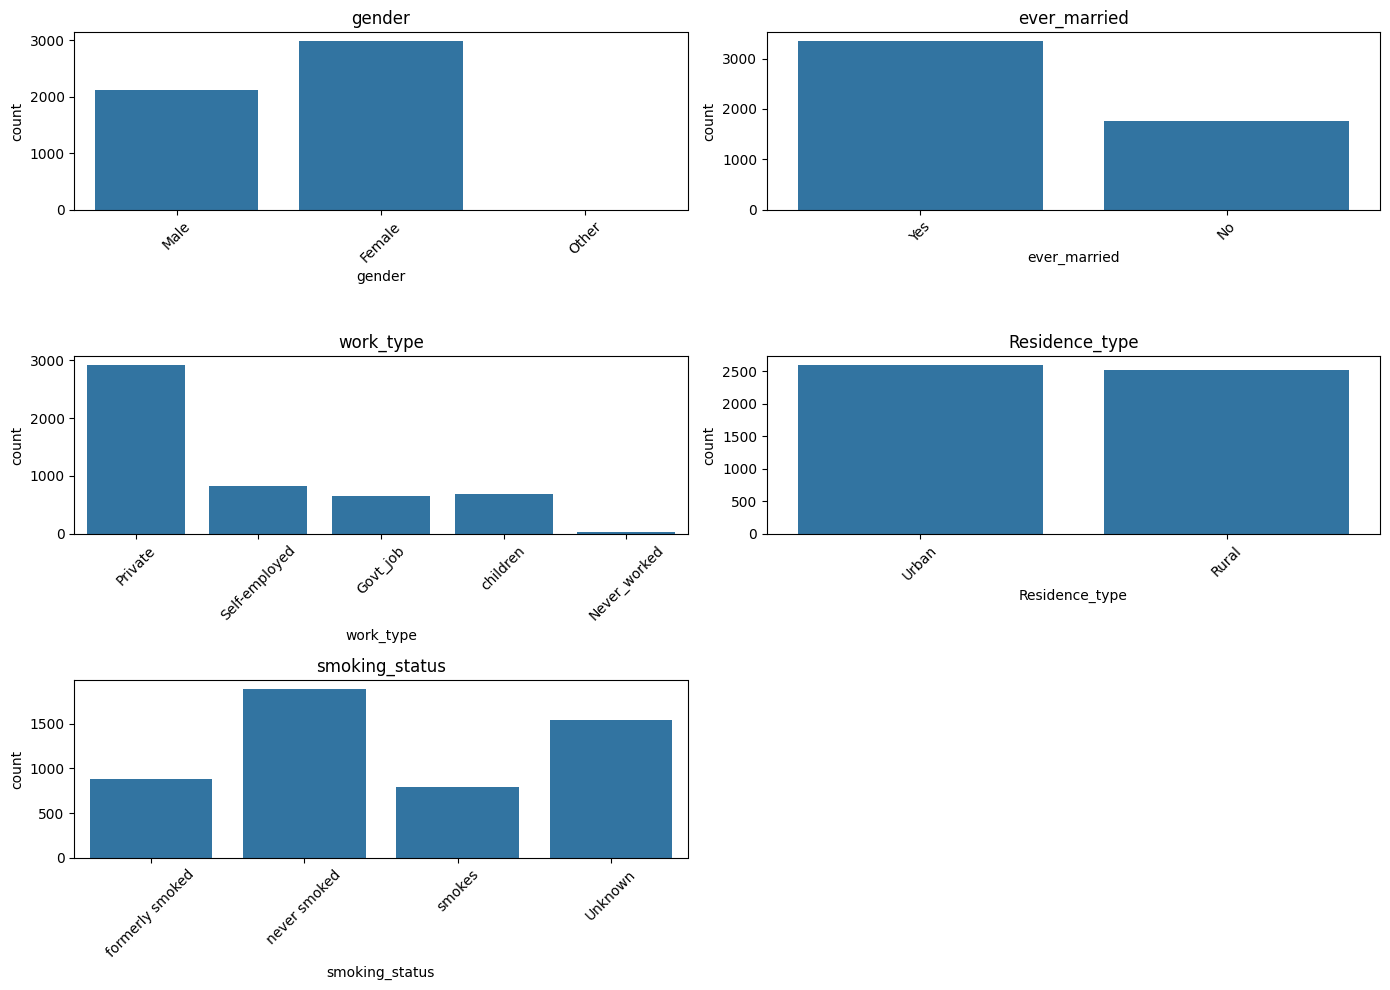

In [11]:
# Distribusi Variabel Kategorikal
cat_cols = ['gender','ever_married','work_type','Residence_type','smoking_status']

plt.figure(figsize=(14,10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3,2,i)
    sns.countplot(data=df, x=col)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


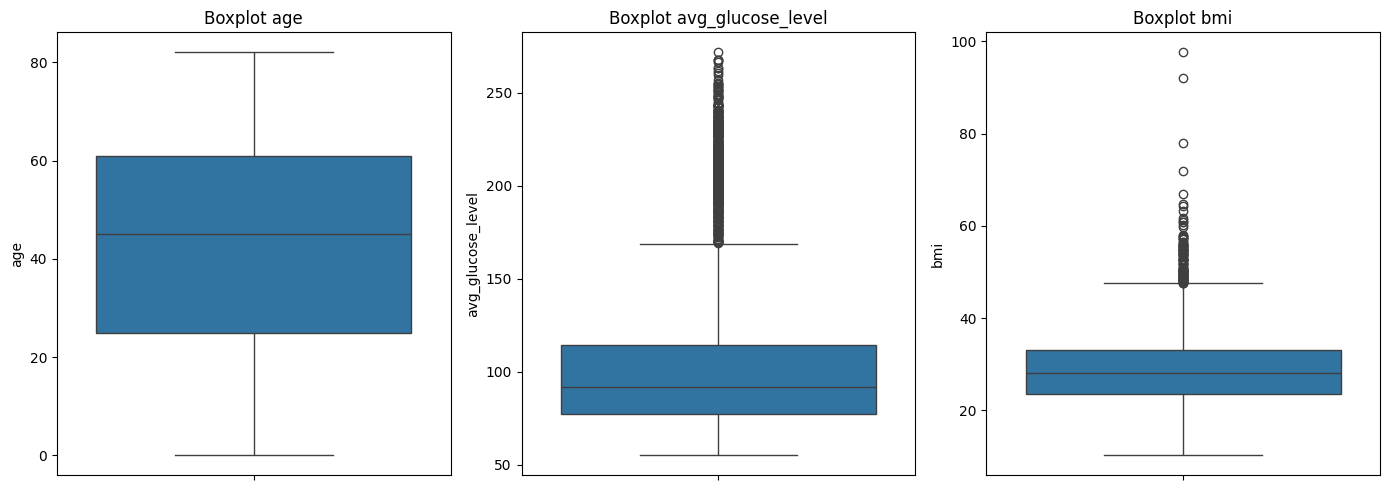

In [12]:
# Boxplot untuk outlier
plt.figure(figsize=(14,5))
for i, col in enumerate(num_cols,1):
    plt.subplot(1,3,i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot {col}")
plt.tight_layout()
plt.show()


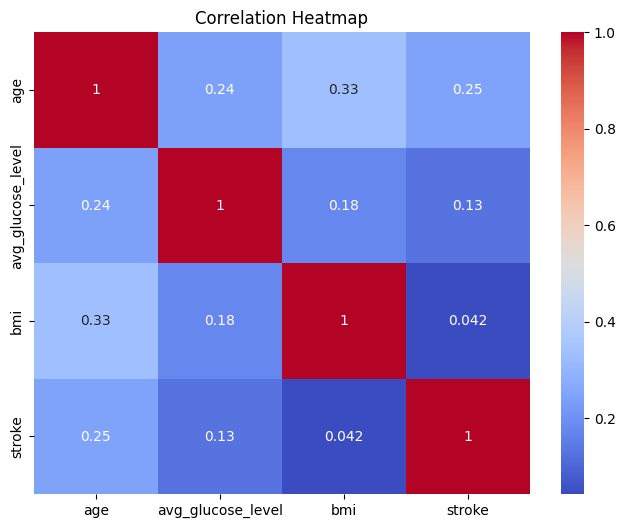

In [13]:
# Korelasi antar variabel numerik
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols + ['stroke']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## PREPROCESSING DATA

In [14]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")


In [15]:
# Kolom 'id' tidak informatif untuk prediksi
df = df.drop(columns=["id"])

# Pisahkan fitur dan target
X = df.drop("stroke", axis=1)
y = df["stroke"]

# SPLIT TRAIN/TEST
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Distribusi label TRAIN:")
print(y_train.value_counts(normalize=True))

print("\nDistribusi label TEST:")
print(y_test.value_counts(normalize=True))



Distribusi label TRAIN:
stroke
0    0.951321
1    0.048679
Name: proportion, dtype: float64

Distribusi label TEST:
stroke
0    0.951076
1    0.048924
Name: proportion, dtype: float64


In [16]:
# Tentukan fitur numerik dan kategorikal
numeric_features = ["age", "avg_glucose_level", "bmi"]

categorical_features = [
    "gender",
    "ever_married",
    "work_type",
    "Residence_type",
    "smoking_status"
]


# Impute + Encode + Scaling
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


# Fit hanya di TRAIN untuk mencegah data leakage
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed  = preprocessor.transform(X_test)

print("Shape X_train sebelum preprocessing:", X_train.shape)
print("Shape X_train setelah preprocessing:", X_train_processed.shape)

print("Shape X_test setelah preprocessing:", X_test_processed.shape)



Shape X_train sebelum preprocessing: (4088, 10)
Shape X_train setelah preprocessing: (4088, 19)
Shape X_test setelah preprocessing: (1022, 19)


## Balancing Techniques

In [17]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour, NeighbourhoodCleaningRule
from collections import Counter


In [18]:
print("Distribusi label SEBELUM balancing:")
print(Counter(y_train))
print("Shape X_train_processed:", X_train_processed.shape)


Distribusi label SEBELUM balancing:
Counter({0: 3889, 1: 199})
Shape X_train_processed: (4088, 19)


In [19]:
# Fungsi buat apply balancing techniques
def apply_balancing(name, sampler, X, y):
    print(f"\n=== {name} ===")

    print("Sebelum balancing:")
    print("Shape X:", X.shape)
    print("Distribusi y:", Counter(y))

    X_res, y_res = sampler.fit_resample(X, y)

    print("Sesudah balancing:")
    print("Shape X:", X_res.shape)
    print("Distribusi y:", Counter(y_res))

    return X_res, y_res


In [20]:
# ROS
ros = RandomOverSampler(random_state=42)

X_ros, y_ros = apply_balancing(
    "Random Oversampling (ROS)",
    ros,
    X_train_processed,
    y_train
)



=== Random Oversampling (ROS) ===
Sebelum balancing:
Shape X: (4088, 19)
Distribusi y: Counter({0: 3889, 1: 199})
Sesudah balancing:
Shape X: (7778, 19)
Distribusi y: Counter({0: 3889, 1: 3889})


In [21]:
# RUS
rus = RandomUnderSampler(random_state=42)

X_rus, y_rus = apply_balancing(
    "Random Undersampling (RUS)",
    rus,
    X_train_processed,
    y_train
)



=== Random Undersampling (RUS) ===
Sebelum balancing:
Shape X: (4088, 19)
Distribusi y: Counter({0: 3889, 1: 199})
Sesudah balancing:
Shape X: (398, 19)
Distribusi y: Counter({0: 199, 1: 199})


In [22]:
# SMOTE
smote = SMOTE(random_state=42)

X_smote, y_smote = apply_balancing(
    "SMOTE",
    smote,
    X_train_processed,
    y_train
)



=== SMOTE ===
Sebelum balancing:
Shape X: (4088, 19)
Distribusi y: Counter({0: 3889, 1: 199})
Sesudah balancing:
Shape X: (7778, 19)
Distribusi y: Counter({0: 3889, 1: 3889})


In [23]:
# ADASYN
adasyn = ADASYN(random_state=42)

X_adasyn, y_adasyn = apply_balancing(
    "ADASYN",
    adasyn,
    X_train_processed,
    y_train
)



=== ADASYN ===
Sebelum balancing:
Shape X: (4088, 19)
Distribusi y: Counter({0: 3889, 1: 199})
Sesudah balancing:
Shape X: (7814, 19)
Distribusi y: Counter({1: 3925, 0: 3889})


In [24]:
# CNN
cnn = CondensedNearestNeighbour(random_state=42)

X_cnn, y_cnn = apply_balancing(
    "Condensed Nearest Neighbour (CNN)",
    cnn,
    X_train_processed,
    y_train
)



=== Condensed Nearest Neighbour (CNN) ===
Sebelum balancing:
Shape X: (4088, 19)
Distribusi y: Counter({0: 3889, 1: 199})
Sesudah balancing:
Shape X: (784, 19)
Distribusi y: Counter({0: 585, 1: 199})


In [25]:
# NCR
ncr = NeighbourhoodCleaningRule()

X_ncr, y_ncr = apply_balancing(
    "Neighbourhood Cleaning Rule (NCR)",
    ncr,
    X_train_processed,
    y_train
)



=== Neighbourhood Cleaning Rule (NCR) ===
Sebelum balancing:
Shape X: (4088, 19)
Distribusi y: Counter({0: 3889, 1: 199})
Sesudah balancing:
Shape X: (3650, 19)
Distribusi y: Counter({0: 3451, 1: 199})


In [26]:
# SMOTE + NCR
# Step 1: SMOTE
X_smote_temp, y_smote_temp = SMOTE(random_state=42).fit_resample(
    X_train_processed, y_train
)

# Step 2: NCR
X_smote_ncr, y_smote_ncr = NeighbourhoodCleaningRule().fit_resample(
    X_smote_temp, y_smote_temp
)

print("\n=== SMOTE + NCR ===")
print("Shape:", X_smote_ncr.shape)
print("Distribusi:", Counter(y_smote_ncr))



=== SMOTE + NCR ===
Shape: (7040, 19)
Distribusi: Counter({0: 3889, 1: 3151})


In [27]:
# ADASYN + NCR
# Step 1: ADASYN
X_adasyn_temp, y_adasyn_temp = ADASYN(random_state=42).fit_resample(
    X_train_processed, y_train
)

# Step 2: NCR
X_adasyn_ncr, y_adasyn_ncr = NeighbourhoodCleaningRule().fit_resample(
    X_adasyn_temp, y_adasyn_temp
)

print("\n=== ADASYN + NCR ===")
print("Shape:", X_adasyn_ncr.shape)
print("Distribusi:", Counter(y_adasyn_ncr))



=== ADASYN + NCR ===
Shape: (7099, 19)
Distribusi: Counter({0: 3889, 1: 3210})


In [28]:
balanced_data = {
    "Original": (X_train_processed, y_train),
    "ROS": (X_ros, y_ros),
    "RUS": (X_rus, y_rus),
    "SMOTE": (X_smote, y_smote),
    "ADASYN": (X_adasyn, y_adasyn),
    "CNN": (X_cnn, y_cnn),
    "NCR": (X_ncr, y_ncr),
    "SMOTE+NCR": (X_smote_ncr, y_smote_ncr),
    "ADASYN+NCR": (X_adasyn_ncr, y_adasyn_ncr)
}

In [29]:
from collections import Counter

print("\n==============================")
print("Original Data (Before Balancing)")
print("==============================")
print(f"Shape X_train_processed: {X_train_processed.shape}")
print(f"Distribusi y_train: {Counter(y_train)}")

for method_name, (X_train_bal, y_train_bal) in balanced_data.items():
    if method_name != "Original":
        print(f"\n==============================")
        print(f"Balancing Technique: {method_name}")
        print("==============================")

        print("Sebelum balancing (Original TRAIN data):")
        print(f"Shape X: {X_train_processed.shape}")
        print(f"Distribusi y: {Counter(y_train)}")

        print("Sesudah balancing:")
        print(f"Shape X: {X_train_bal.shape}")
        print(f"Distribusi y: {Counter(y_train_bal)}")


Original Data (Before Balancing)
Shape X_train_processed: (4088, 19)
Distribusi y_train: Counter({0: 3889, 1: 199})

Balancing Technique: ROS
Sebelum balancing (Original TRAIN data):
Shape X: (4088, 19)
Distribusi y: Counter({0: 3889, 1: 199})
Sesudah balancing:
Shape X: (7778, 19)
Distribusi y: Counter({0: 3889, 1: 3889})

Balancing Technique: RUS
Sebelum balancing (Original TRAIN data):
Shape X: (4088, 19)
Distribusi y: Counter({0: 3889, 1: 199})
Sesudah balancing:
Shape X: (398, 19)
Distribusi y: Counter({0: 199, 1: 199})

Balancing Technique: SMOTE
Sebelum balancing (Original TRAIN data):
Shape X: (4088, 19)
Distribusi y: Counter({0: 3889, 1: 199})
Sesudah balancing:
Shape X: (7778, 19)
Distribusi y: Counter({0: 3889, 1: 3889})

Balancing Technique: ADASYN
Sebelum balancing (Original TRAIN data):
Shape X: (4088, 19)
Distribusi y: Counter({0: 3889, 1: 199})
Sesudah balancing:
Shape X: (7814, 19)
Distribusi y: Counter({1: 3925, 0: 3889})

Balancing Technique: CNN
Sebelum balancing (

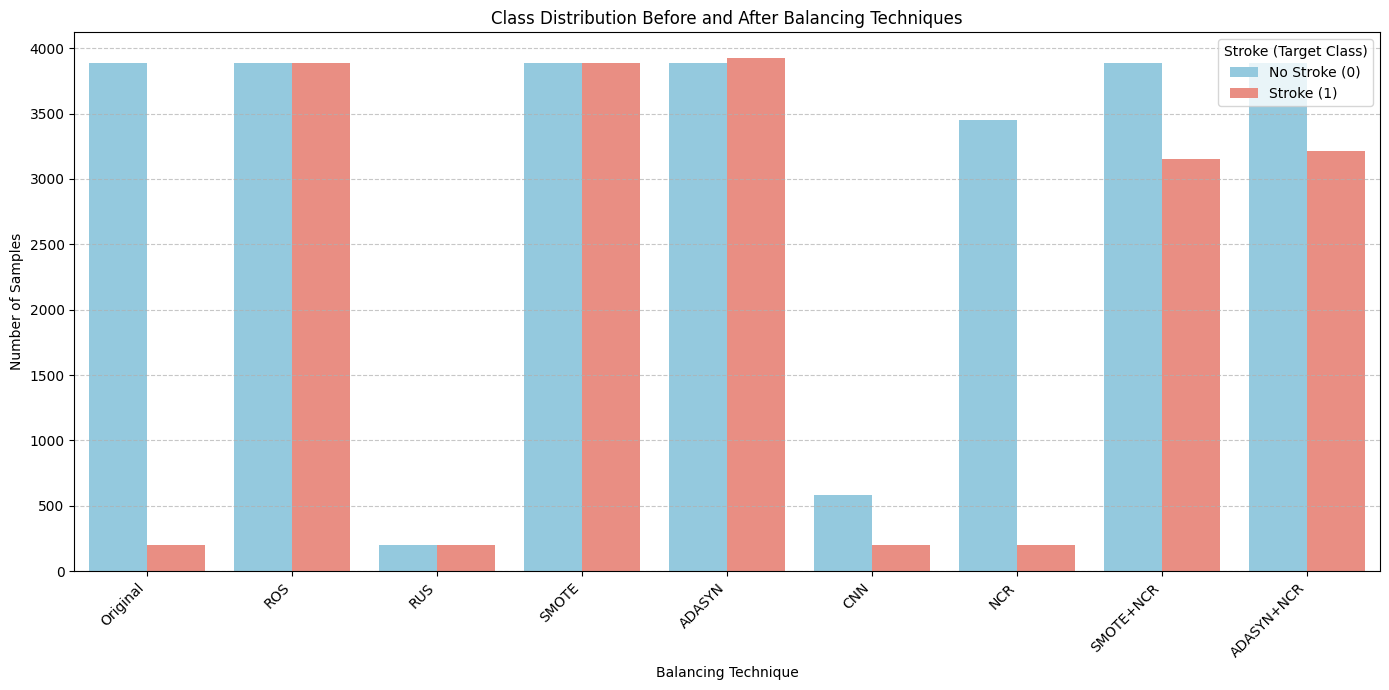

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
plot_data = []

# Original data
original_counts = Counter(y_train)
plot_data.append({"Balancing Technique": "Original", "Class": 0, "Count": original_counts[0]})
plot_data.append({"Balancing Technique": "Original", "Class": 1, "Count": original_counts[1]})

# Balanced data
for method_name, (X_bal, y_bal) in balanced_data.items():
    if method_name != "Original":
        balanced_counts = Counter(y_bal)
        plot_data.append({"Balancing Technique": method_name, "Class": 0, "Count": balanced_counts[0]})
        plot_data.append({"Balancing Technique": method_name, "Class": 1, "Count": balanced_counts[1]})

plot_df = pd.DataFrame(plot_data)

# Plotting
plt.figure(figsize=(14, 7))
g = sns.barplot(
    data=plot_df,
    x="Balancing Technique",
    y="Count",
    hue="Class",
    palette=["skyblue", "salmon"]
)
plt.title("Class Distribution Before and After Balancing Techniques")
plt.xlabel("Balancing Technique")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45, ha="right")


handles, current_labels = g.get_legend_handles_labels()

new_labels = ["No Stroke (0)" if label == '0' else "Stroke (1)" for label in current_labels]

plt.legend(handles, new_labels, title="Stroke (Target Class)")


plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Modeling

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    recall_score,
    precision_score,
    f1_score,
    roc_auc_score,
    ConfusionMatrixDisplay
)



In [32]:
# Logistic Regression

lr_results = []

for method_name, (X_bal, y_bal) in balanced_data.items():
    print(f"\n=== Logistic Regression + {method_name} ===")

    model = LogisticRegression(
        max_iter=1000,
        class_weight=None,
        random_state=42
    )

    model.fit(X_bal, y_bal)

    y_pred = model.predict(X_test_processed)
    y_proba = model.predict_proba(X_test_processed)[:, 1]

    print(classification_report(y_test, y_pred))

    lr_results.append({
        "Model": "Logistic Regression",
        "Balancing": method_name,
        "Recall": recall_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC_AUC": roc_auc_score(y_test, y_proba)
    })



=== Logistic Regression + Original ===
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022


=== Logistic Regression + ROS ===
              precision    recall  f1-score   support

           0       0.98      0.74      0.84       972
           1       0.13      0.78      0.23        50

    accuracy                           0.74      1022
   macro avg       0.56      0.76      0.54      1022
weighted avg       0.94      0.74      0.81      1022


=== Logistic Regression + RUS ===
              precision    recall  f1-score   support

           0       0.99      0.73      0.84       972
           1       0.13      0.80      0.22        50

    accuracy                           0.73      1022
   macro avg      

Model     : Logistic Regression
Balancing : RUS
Recall    : 0.8
Precision : 0.1303
F1        : 0.2241
ROC_AUC   : 0.8411


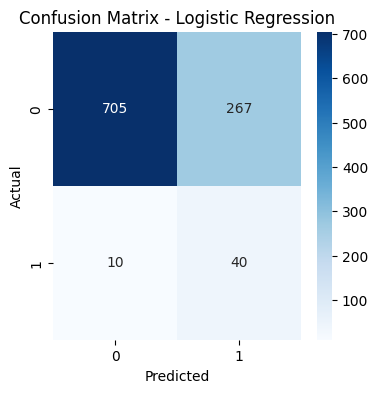

In [33]:
# Confusion Matrix Logistic Regression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

best_lr = max(lr_results, key=lambda x: x["Recall"])

for k, v in best_lr.items():
    print(f"{k:10s}: {round(v,4) if isinstance(v, float) else v}")

best_method = best_lr["Balancing"]
X_best, y_best = balanced_data[best_method]

best_lr_model = LogisticRegression(max_iter=1000, random_state=42)
best_lr_model.fit(X_best, y_best)

cm = confusion_matrix(y_test, best_lr_model.predict(X_test_processed))

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [34]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt_results = []

for method_name, (X_bal, y_bal) in balanced_data.items():
    print(f"\n=== Decision Tree + {method_name} ===")

    model = DecisionTreeClassifier(
        max_depth=5,
        random_state=42
    )

    model.fit(X_bal, y_bal)

    y_pred = model.predict(X_test_processed)
    y_proba = model.predict_proba(X_test_processed)[:, 1]

    print(classification_report(y_test, y_pred))

    dt_results.append({
        "Model": "Decision Tree",
        "Balancing": method_name,
        "Recall": recall_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC_AUC": roc_auc_score(y_test, y_proba)
    })



=== Decision Tree + Original ===
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022


=== Decision Tree + ROS ===
              precision    recall  f1-score   support

           0       0.98      0.73      0.84       972
           1       0.12      0.74      0.21        50

    accuracy                           0.73      1022
   macro avg       0.55      0.73      0.52      1022
weighted avg       0.94      0.73      0.81      1022


=== Decision Tree + RUS ===
              precision    recall  f1-score   support

           0       0.98      0.71      0.82       972
           1       0.12      0.78      0.21        50

    accuracy                           0.71      1022
   macro avg       0.55      0.74   

Model     : Decision Tree
Balancing : SMOTE
Recall    : 0.8
Precision : 0.1266
F1        : 0.2186
ROC_AUC   : 0.8172


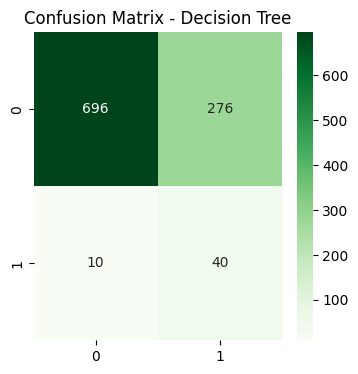

In [35]:
# Confusion Matrix Decision Tree
best_dt = max(dt_results, key=lambda x: x["Recall"])

for k, v in best_dt.items():
    print(f"{k:10s}: {round(v,4) if isinstance(v, float) else v}")

best_method = best_dt["Balancing"]
X_best, y_best = balanced_data[best_method]

best_dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
best_dt_model.fit(X_best, y_best)

cm = confusion_matrix(y_test, best_dt_model.predict(X_test_processed))

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


In [36]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_results = []

for method_name, (X_bal, y_bal) in balanced_data.items():
    print(f"\n=== Random Forest + {method_name} ===")

    model = RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        random_state=42
    )

    model.fit(X_bal, y_bal)

    y_pred = model.predict(X_test_processed)
    y_proba = model.predict_proba(X_test_processed)[:, 1]

    print(classification_report(y_test, y_pred))

    rf_results.append({
        "Model": "Random Forest",
        "Balancing": method_name,
        "Recall": recall_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC_AUC": roc_auc_score(y_test, y_proba)
    })



=== Random Forest + Original ===
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022


=== Random Forest + ROS ===
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       972
           1       0.15      0.32      0.20        50

    accuracy                           0.88      1022
   macro avg       0.56      0.61      0.57      1022
weighted avg       0.92      0.88      0.90      1022


=== Random Forest + RUS ===
              precision    recall  f1-score   support

           0       0.98      0.70      0.82       972
           1       0.12      0.78      0.20        50

    accuracy                           0.70      1022
   macro avg       0.55      0.74   

Model     : Random Forest
Balancing : RUS
Recall    : 0.78
Precision : 0.1171
F1        : 0.2037
ROC_AUC   : 0.8031


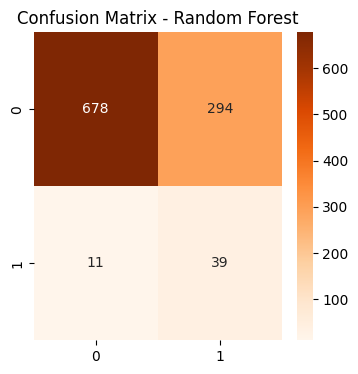

In [37]:
# Confusion Matrix Random Forest
best_rf = max(rf_results, key=lambda x: x["Recall"])

for k, v in best_rf.items():
    print(f"{k:10s}: {round(v,4) if isinstance(v, float) else v}")

best_method = best_rf["Balancing"]
X_best, y_best = balanced_data[best_method]

best_rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)
best_rf_model.fit(X_best, y_best)

cm = confusion_matrix(y_test, best_rf_model.predict(X_test_processed))

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [38]:
# XGBoost
from xgboost import XGBClassifier

xgb_results = []

for method_name, (X_bal, y_bal) in balanced_data.items():
    print(f"\n=== XGBoost + {method_name} ===")

    model = XGBClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        eval_metric="logloss",
        random_state=42
    )

    model.fit(X_bal, y_bal)

    y_pred = model.predict(X_test_processed)
    y_proba = model.predict_proba(X_test_processed)[:, 1]

    print(classification_report(y_test, y_pred))

    xgb_results.append({
        "Model": "XGBoost",
        "Balancing": method_name,
        "Recall": recall_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC_AUC": roc_auc_score(y_test, y_proba)
    })



=== XGBoost + Original ===
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.25      0.04      0.07        50

    accuracy                           0.95      1022
   macro avg       0.60      0.52      0.52      1022
weighted avg       0.92      0.95      0.93      1022


=== XGBoost + ROS ===
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       972
           1       0.22      0.22      0.22        50

    accuracy                           0.92      1022
   macro avg       0.59      0.59      0.59      1022
weighted avg       0.92      0.92      0.92      1022


=== XGBoost + RUS ===
              precision    recall  f1-score   support

           0       0.98      0.73      0.83       972
           1       0.12      0.70      0.20        50

    accuracy                           0.72      1022
   macro avg       0.55      0.71      0.52      1022


Model     : XGBoost
Balancing : RUS
Recall    : 0.7
Precision : 0.1159
F1        : 0.1989
ROC_AUC   : 0.8116


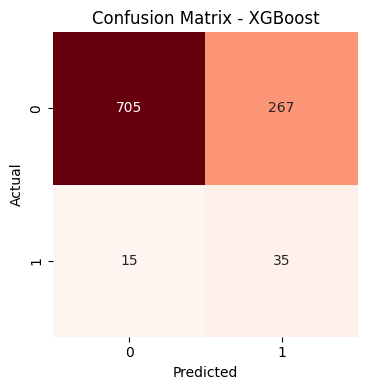

In [39]:
# Confusion Matrix XGBoost
best_xgb = max(xgb_results, key=lambda x: x["Recall"])


for k, v in best_xgb.items():
    print(f"{k:10s}: {round(v,4) if isinstance(v, float) else v}")


best_method = best_xgb["Balancing"]
X_best, y_best = balanced_data[best_method]

best_xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    eval_metric="logloss",
    random_state=42
)
best_xgb_model.fit(X_best, y_best)

cm = confusion_matrix(y_test, best_xgb_model.predict(X_test_processed))

plt.figure(figsize=(4,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Reds",
    square=True,
    cbar=False
)
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [40]:
df_results = pd.DataFrame(
    lr_results + dt_results + rf_results + xgb_results
)

df_results.sort_values("Recall", ascending=False)


,Model,Balancing,Recall,Precision,F1,ROC_AUC
2,Logistic Regression,RUS,0.80,0.130293,0.224090,0.841132
16,Decision Tree,SMOTE+NCR,0.80,0.144404,0.244648,0.816265
12,Decision Tree,SMOTE,0.80,0.126582,0.218579,0.817222
1,Logistic Regression,ROS,0.78,0.133106,0.227405,0.843436
11,Decision Tree,RUS,0.78,0.120000,0.208000,0.802377
3,Logistic Regression,SMOTE,0.78,0.136842,0.232836,0.844012
4,Logistic Regression,ADASYN,0.78,0.135889,0.231454,0.844506
7,Logistic Regression,SMOTE+NCR,0.78,0.154762,0.258278,0.841872
20,Random Forest,RUS,0.78,0.117117,0.203655,0.803148
8,Logistic Regression,ADASYN+NCR,0.78,0.148289,0.249201,0.842819


In [41]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt


In [42]:
def plot_learning_curve(
    model,
    X,
    y,
    title,
    cv=5
):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator=model,
        X=X,
        y=y,
        cv=cv,
        scoring="recall",
        train_sizes=np.linspace(0.1, 1.0, 5),
        n_jobs=-1
    )

    train_mean = train_scores.mean(axis=1)
    val_mean = val_scores.mean(axis=1)

    plt.figure(figsize=(6,4))
    plt.plot(train_sizes, train_mean, 'o-', label="Training Recall")
    plt.plot(train_sizes, val_mean, 'o-', label="Validation Recall")
    plt.xlabel("Training Set Size")
    plt.ylabel("Recall")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


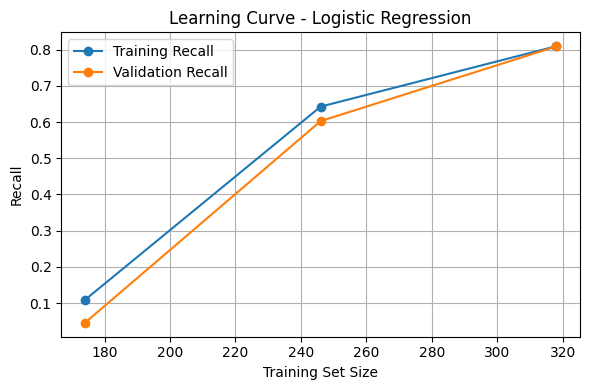

In [43]:
# Ambil data terbaik
# Logistic Regression
lr_best_method = best_lr["Balancing"]
X_lr_best, y_lr_best = balanced_data[lr_best_method]

lr_final = LogisticRegression(
    max_iter=1000,
    random_state=42
)

plot_learning_curve(
    model=lr_final,
    X=X_lr_best,
    y=y_lr_best,
    title="Learning Curve - Logistic Regression"
)


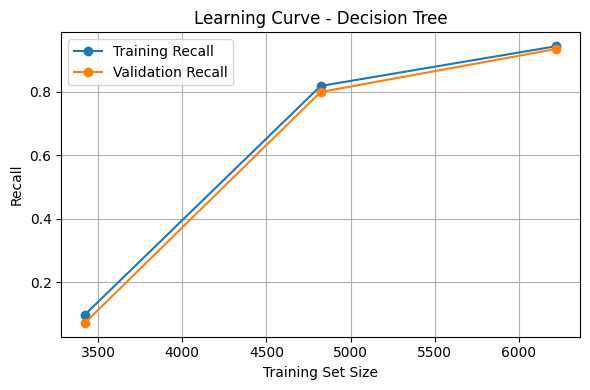

In [44]:
# Decision Tree
dt_best_method = best_dt["Balancing"]
X_dt_best, y_dt_best = balanced_data[dt_best_method]

dt_final = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

plot_learning_curve(
    model=dt_final,
    X=X_dt_best,
    y=y_dt_best,
    title="Learning Curve - Decision Tree"
)


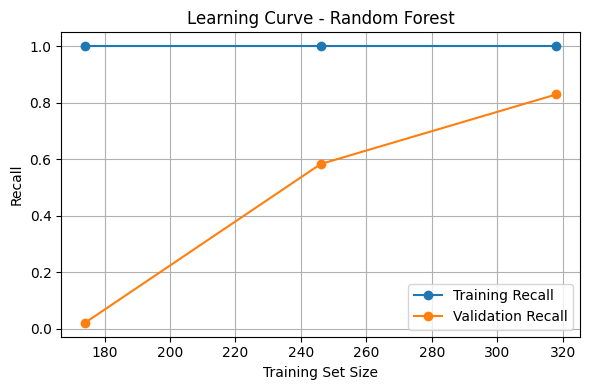

In [45]:
# Random Forest
rf_best_method = best_rf["Balancing"]
X_rf_best, y_rf_best = balanced_data[rf_best_method]

rf_final = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

plot_learning_curve(
    model=rf_final,
    X=X_rf_best,
    y=y_rf_best,
    title="Learning Curve - Random Forest"
)


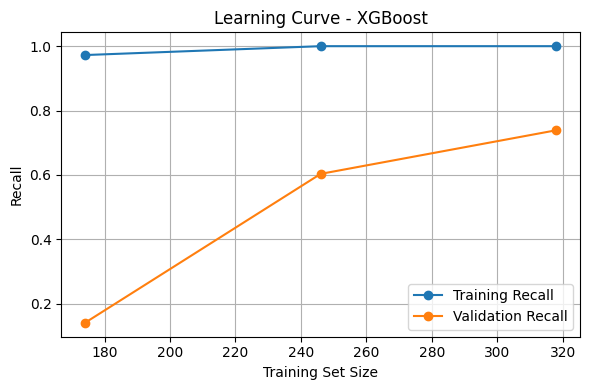

In [46]:
# XGBoost
xgb_best_method = best_xgb["Balancing"]
X_xgb_best, y_xgb_best = balanced_data[xgb_best_method]

xgb_final = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    eval_metric="logloss",
    random_state=42
)

plot_learning_curve(
    model=xgb_final,
    X=X_xgb_best,
    y=y_xgb_best,
    title="Learning Curve - XGBoost"
)
